<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/lesson3_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# 코드로 형식 지정됨
```

## Multi-label prediction with Planet Amazon dataset
다중 레이블 이미지 분류를 수행하는 방법

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
import sys

In [4]:
from google.colab import drive                  #구글 드라이버연결
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
kagglePath = '/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs'

In [6]:
cd "/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs"      

/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs


In [7]:
!ls       #kaggle.json이 이위치에 있는 지 확인

dl1  dl2  kaggle.json  planet  SegNet-Tutorial	swift  test_v2_file_mapping.csv


## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [0]:
#! {sys.executable} -m pip install kaggle --upgrade      

캐글(Kaggle)은 2010년 설립된 예측모델 및 분석 대회 플랫폼이다. 기업 및 단체에서 데이터와 해결과제를 등록하면, 데이터 과학자들이 이를 해결하는 모델을 개발하고 경쟁한다.

In [0]:
path1 = Path('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/.kaggle/')
path1.mkdir(parents=True, exist_ok=True)
#! mkdir -p ~/.kaggle/                      # kaggle.json api인증 파일을 저 경로에다가 옮겨 놓기
#! mv kaggle.json ~/.kaggle/               #파일이동
! cp kaggle.json '/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/.kaggle/'     #파일 복사해서 이동 (저는 이 명령어로 실행)
!chmod 600 '/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/.kaggle/kaggle.json'         # 이 파일을 실행할 때 Permission Warning 이 일어나지 않도록 
# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle

In [10]:
ls -1ha kaggle.json   # json 파일 제대로 업로드 됐는지 확인. - kaggle.json이 뜬다면 제대로 업로드 된거임

kaggle.json


In [0]:
!kaggle competitions list     # 본인이 참가한 모든 대회 보기 

You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

In [12]:
path = Path('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/planet/train_v2.csv')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/planet/train_v2.csv')

# 데이터셋 다운로드 받기 - 링크는 그 대회 'Data'에 있음

#  압축 풀기 

In [0]:
 #! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
 #! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}   planet-understanding-the-amazon-from-space.zip
  #! unzip -q -n {path}/train_v2.csv.zip -d {path}      

To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip-full` in your terminal).

In [14]:

!conda --version

/bin/bash: conda: command not found


In [15]:
! conda install --yes --prefix {sys.prefix} -c haasad eidl7zip    # zip파일뿐만 아니라 7zip파일 때문에 이런 명령어를 수행해줘야 함,,  

/bin/bash: conda: command not found


In [16]:
!7za


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Usage: 7za <command> [<switches>...] <archive_name> [<file_names>...]
       [<@listfiles...>]

<Commands>
  a : Add files to archive
  b : Benchmark
  d : Delete files from archive
  e : Extract files from archive (without using directory names)
  h : Calculate hash values for files
  i : Show information about supported formats
  l : List contents of archive
  rn : Rename files in archive
  t : Test integrity of archive
  u : Update files to archive
  x : eXtract files with full paths

<Switches>
  -- : Stop switches parsing
  -ai[r[-|0]]{@listfile|!wildcard} : Include archives
  -ax[r[-|0]]{@listfile|!wildcard} : eXclude archives
  -ao{a|s|t|u} : set Overwrite mode
  -an : disable archive_name field
  -bb[0-3] : set output log level
  -bd : disable progress indicator
  -bs{o|e|p}{0|1|

In [0]:
path2 =  Path('/Users/myungjin/Desktop/project/train-jpg.tar.7z')

In [0]:
! 7za -bd -y -so x {path2} | tar xf - -C {path2.as_posix()}    #7zip을 압축 풀기

## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

In [19]:
df = pd.read_csv(path/'train_v2.csv')       # pd를 사용하여 그 경로에 있는 csv파일 읽어보기  (다중 레이어로 되어있는)
df.head()                                    #5개의 행만 보고 싶다면 head명령어를 사용하면 됩니다. 

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)           #상하 좌우 바껴도 상관없고, max_warp사진의 원근을 변경합

We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')   #csv파일에서 가지고 오고 folder='train-jpg' 폴더 이름이고 폴더 안에 형식은 jpg 입니다
       .split_by_rand_pct(0.2)                                                        #데이터를 무작위로 20 % 분할
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)                       #tfms의 이미지 형식과, 이미지 128 크기로 해서 데이터를 정규화 시킴
        .databunch().normalize(imagenet_stats))

databrunch  (학습 데이터와 검증 데이터) 있어야 한다

`show_batch` still works, and show us the different labels separated by `;`.

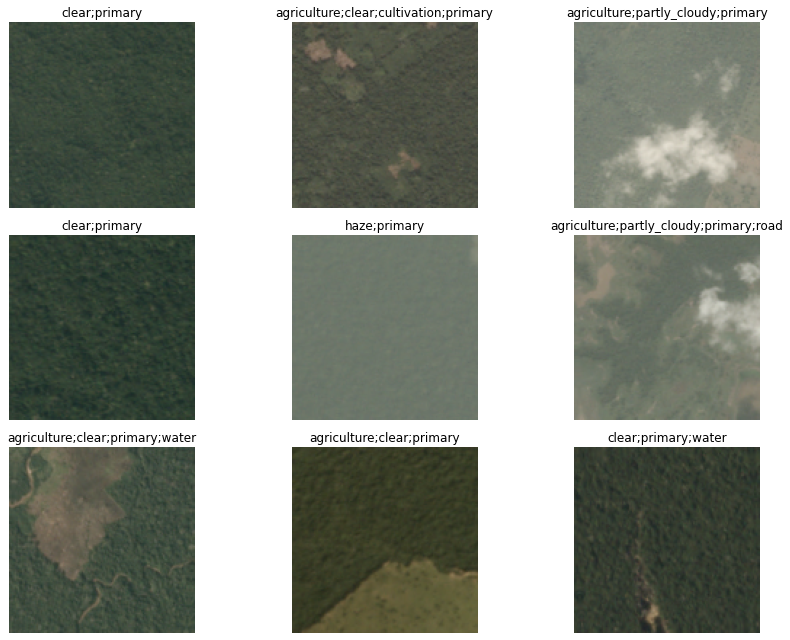

In [23]:
data.show_batch(rows=3, figsize=(12,9))           #이미지 보여주기

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet50 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [0]:
arch = models.resnet50                # resnet50 모델 구조

In [25]:
acc_02 = partial(accuracy_thresh, thresh=0.2)   # 모델 구조
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])    # acc_02= 정확성 f_score= kaggle 기준으로 평가]    metrics 기능은 모델의 학습효과를 증가시키기는 것이 아니라 보여주기 용이다

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


We use the LR Finder to pick a good learning rate.

In [26]:
learn.lr_find()             # 학습 속도 비율을 찾아서

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


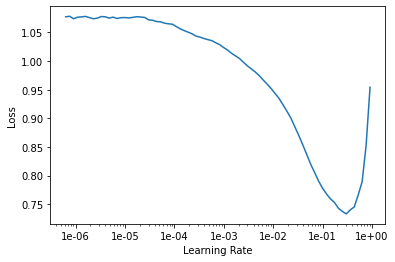

In [27]:
learn.recorder.plot()      # 그래프로 보여주기

Then we can fit the head of our network.

In [0]:
lr = 0.01              # 그래프의 가장 가파른 부분이 적당한 속도이다

In [29]:
learn.fit_one_cycle(5, slice(lr))   # 5번의 학습과 0.01학습 속도로 훈련

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.920543,0.696590,0.436299,0.534972,01:15
1,0.717741,0.328909,0.728939,0.704512,00:07
2,0.513555,0.174591,0.921963,0.863091,00:07
3,0.391053,0.170384,0.939699,0.867155,00:07
4,0.316042,0.164275,0.936743,0.866970,00:07


In [0]:
learn.save('stage-1-rn50')        # 저장

...And fine-tune the whole model:

In [0]:
learn.unfreeze()        # 잠긴 레이어 풀어줘서 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


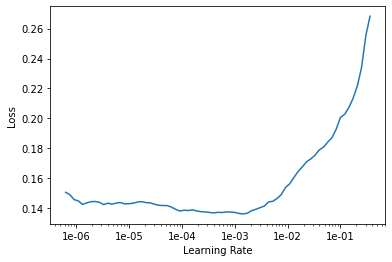

In [32]:
learn.lr_find()         # 학습 속도 비율 찾아주고
learn.recorder.plot()     # 그래프 보여주기

In [33]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))   # 5번 학습 1e-5에서 lr/5까지 나눠서 속도 조절

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.143256,0.163205,0.937334,0.868096,00:08
1,0.139780,0.160851,0.938516,0.872684,00:08
2,0.129159,0.150510,0.939994,0.884918,00:08
3,0.118176,0.148478,0.942063,0.882998,00:08
4,0.108634,0.148115,0.940585,0.882974,00:08


In [0]:
learn.save('stage-2-rn50')     # 저장

In [35]:
data = (src.transform(tfms, size=128)       # 이미지 사이즈 256으로 다시 바꾼 이유는 그 사이즈로 학습해야지 같은 사이즈로 판별할때 더 정확성이 올라가기 때문에
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [0]:
learn.freeze()                  # 레이어 고정 풀어주고

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


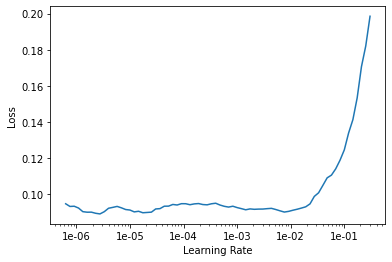

In [37]:
learn.lr_find()                  # 학습 속도 비율 찾아서
learn.recorder.plot()             #그래프로 보여주기

In [0]:
lr=1e-2/2                      #속도

In [39]:
learn.fit_one_cycle(5, slice(lr))    #5번 학습

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.092690,0.150581,0.945019,0.887733,00:07
1,0.096174,0.156404,0.943246,0.883330,00:07
2,0.095220,0.162179,0.945019,0.885731,00:07
3,0.092729,0.162068,0.943246,0.881050,00:07
4,0.086458,0.157914,0.944428,0.885788,00:07


In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.081773,0.158718,0.944724,0.880280,00:08
1,0.078559,0.158246,0.944132,0.878584,00:08
2,0.072811,0.166352,0.947088,0.881095,00:08
3,0.068051,0.154562,0.949749,0.885943,00:08
4,0.063740,0.153868,0.948862,0.886902,00:08


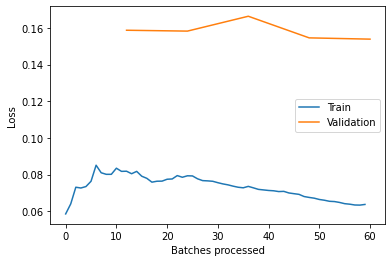

In [43]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

In [0]:
learn.export()

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [0]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df.to_csv(path/'submission.csv', index=False)

In [0]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"   # 다 완성된 것을 케글에 제출 할 수 있다

Private Leaderboard score: 0.9296 (around 80th)